**Deltagere:**
- Andreas H√∏gh (201908525)
- Orhan Djafari Gazrani (201606693)
- Muheebrahman Rahmani (201903896)

**gruppe** 25 

**Dato:** [17-09-2023]





# Intro

I denne opgave arbejdes der med data som fort√¶ller om der er en sammenligning mellem √∏konomi (GDP) og livstilfredshed for forskellige lande.

S√• datas√¶ttet indeholder information om √∏konomiske faktorer (GDP) og sociale faktorer (livstilfredshed), og m√•let er at se, om der er en sammenh√¶ng mellem de to, og i hvilket omfang √∏konomiske faktorer kan forudsige livstilfredshedsscoren for et givet land.

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

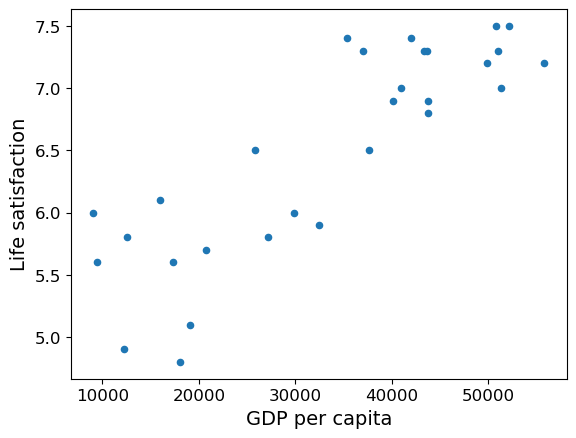

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

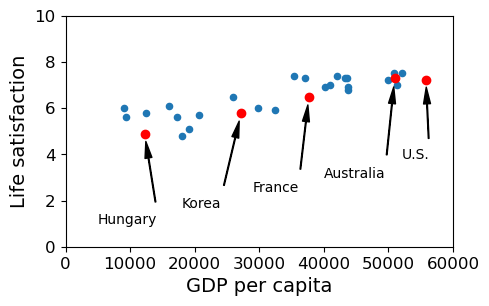

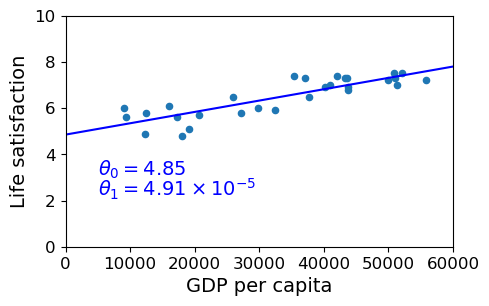

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa) The $\theta$ parameters and the $R^2$ Score

I denne opgave unders√∏ges brug af line√¶r regression og scikit-learn til at tr√¶kke vigtige oplysninger fra en line√¶r regressionsmodel og beregne $R^2$-scoren.

Koefficienterne $\theta_0$ og $\theta_1$ kan udtr√¶kkes fra en line√¶r regressionsmodel i scikit-learn ved hj√¶lp af hhv. intercept_ og coef_ funktionerne

$R^2$-scoren beregnes for en line√¶r regressionsmodel ved at bruge model.score(X, y) i scikit-learn. "Den m√•ler, hvor godt modellen passer til data ved at kvantificere, hvor meget af variansen i den afh√¶ngige variabel (y) forklaret af de uafh√¶ngige variabler (X)." citat chatGPT.

Minimale v√¶rdi for $R^2$-scoren er $-\infty$, mens den maksimale v√¶rdi er 1. En score p√• 1 indikerer en perfekt tilpasning, mens en negativ score indikerer, at modellen er v√¶rre end en simpel konstant model.

Det er bedst at have en h√∏j $R^2$-score, da den m√•ler fitness/goodness. $R^2$-scoren m√•ler, hvor godt modellen passer til de observerede data.

Nedenst√•ende kode viser at modellen har en $R^2$-score p√• 0.734 p√• de data som er defineret.

In [6]:
# Extract the coefficients
theta_0 = model.intercept_ 
theta_1 = model.coef_[0]   

# Print the coefficients
print("Intercept (ùúÉ0):", theta_0)
print("Slope (ùúÉ1):", theta_1)

# R2 score
model.score(X,y)

Intercept (ùúÉ0): [4.8530528]
Slope (ùúÉ1): [4.91154459e-05]


0.734441435543703

### Qb) Using k-Nearest Neighbors

I denne opgave bruges modellen `sklearn.neighbors.KNeighborsRegressor`.

Knn estimerer v√¶rdier ved at se p√• de n√¶rmeste "naboer" datas√¶ttet. Pr√¶cisionen kan justeres ved at v√¶lge, hvor mange "naboer" den skal tage hensyn til (k-v√¶rdien).

kNN regressor bruger R2 som score, mens line√¶r regression ogs√• bruger R2. De scoren for det 2 modeller er derfor sammenlignelige

R2 er en score, der hj√¶lper os med at se, hvor godt vores model passer til vores data. Den fort√¶ller os, hvor meget vores forudsigelser ligner de faktiske resultater. H√∏j R2 betyder, at vores model passer rigtig godt, mens lav R2 betyder, at den ikke g√∏r det s√• godt. Denne metode er velegnet til regression.

I nedenst√•ende kodeblok er der tr√¶net en model med 3 naboer hvorefter der bliver forudsagt en v√¶rdi for Cypern's GDP per capita vha. modellen. Til sidst beregner det ogs√• en score for modellen p√• samme m√•de som line√¶r regression.

X.shape= (29, 1)
y.shape= (29, 1)


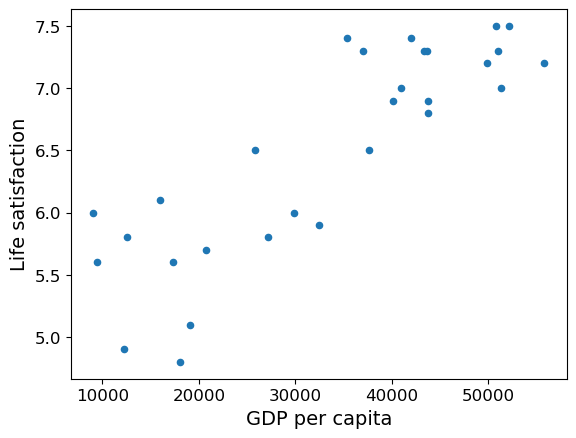

[[5.76666667]]


0.8525732853499179

In [7]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

k = 3  # Antal naboer
knn = KNeighborsRegressor(n_neighbors=k)  # Opret en k-NN-regressionsmodel med k naboer
knn.fit(X, y)  # Tr√¶n modellen
y_pred = knn.predict([[22587]])
print(y_pred) 
knn.score(X,y)

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

I denne opgave er det unders√∏gt, hvordan √¶ndringen i k_neighbor-parameteren p√•virker KNeighborsRegressor-modellen. 

Der blev oprettet tre plots for at sammenligne modellernes pr√¶stationer for forskellige k-v√¶rdier:

K-NN med k = 3.
K-NN med k = 20.
K-NN med k = 1.

Resultaterne viste, at KNeighborsRegressor-modellen med k = 1 var i stand til at tilpasse sig tr√¶ningsdataene med en score p√• 1. Dette indikerer dog en potentiel overfitting, hvilket betyder at modellen f√•r sv√¶rt ved at generalisere, n√•r den modtager ny data. Ved en k-v√¶rdi p√• 20 er der h√∏jst sandsynligt en underfitting da modellen ikke er s√¶rligt pr√¶cis. Ved at justere k-v√¶rdien kan vi styre modellens kompleksitet og evnen til at generalisere til nye data.

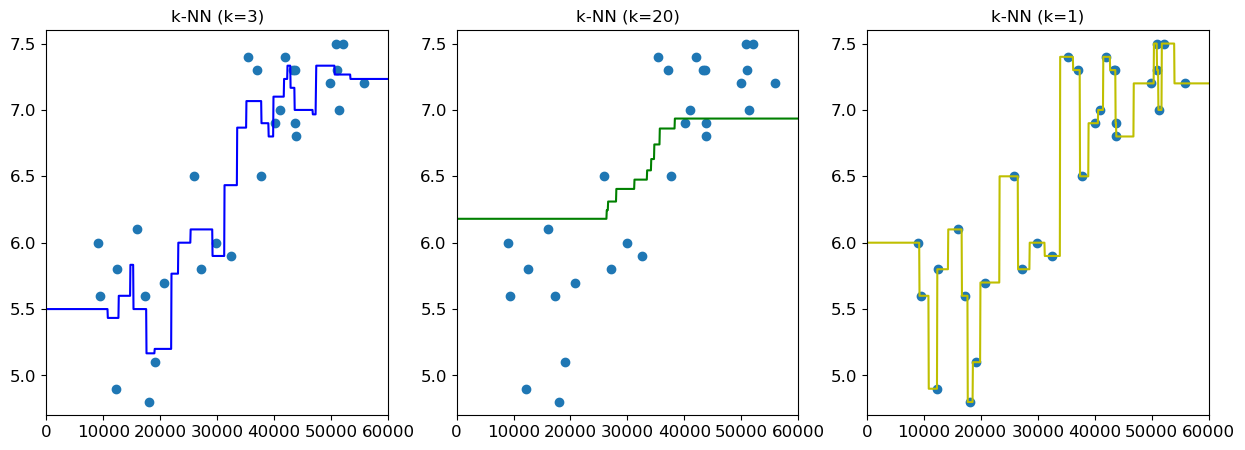

In [8]:
# create a test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

knn20 = KNeighborsRegressor(n_neighbors=20)  # Create a k-NN regression model with 20 neighbors
knn20.fit(X, y)  # Train the model
y_pred_knn20 = knn20.predict(M)

knn1 = KNeighborsRegressor(n_neighbors=1)  # Create a k-NN regression model with 1 neighbor
knn1.fit(X, y)  # Train the model
y_pred_knn1 = knn1.predict(M)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for k=3
axes[0].scatter(X, y)
axes[0].plot(m, y_pred_knn, "b")
axes[0].set_title("k-NN (k=3)")

# Plot for k=20
axes[1].scatter(X, y)
axes[1].plot(m, y_pred_knn20, "g")
axes[1].set_title("k-NN (k=20)")

# Plot for k=1
axes[2].scatter(X, y)
axes[2].plot(m, y_pred_knn1, "y")
axes[2].set_title("k-NN (k=1)")

for ax in axes:
    ax.axis([0, 60000, 4.7, 7.6])

plt.show()


### Qd) Trying out a Neural Network

I denne opgave er brugen af en neuralt netv√¶rk udforsket ved hj√¶lp af Scikit-learns MLPRegressor p√• vores data.

Det er vigtigt at bem√¶rke, at vores data ikke er skalerede, hvilket oftest giver et ubrugeligt output for MLPRegressor.

Vi tr√¶nede mlp-modellen med vores data og forudsagde v√¶rdien for Cypern ved hj√¶lp af denne model. Vi beregnede ogs√• score-v√¶rdien for tr√¶ningss√¶ttet, p√• samme m√•de som vi gjorde for de line√¶re og KNN-modeller.

MLPRegressor's score-funktion bruger samme score, R2, som LinearRegression. Den kan ikke sammenlignes med scoren for knn.
"score(X, y[, sample_weight]) Return the coefficient of determination of the prediction." citat https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Nedenst√•ende kode opretter og tr√¶ner en MLPRegressor, laver forudsigelser og sammenligner resultaterne med line√¶r regression og kNN modeller. Den viser grafer for hver model og udskriver forudsagte v√¶rdier og scores for MLPRegressor. Resultatet afviger meget fra 

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120468
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07033998
Iteration 8, loss = 266429359.38609853
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816029
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747611
Iteration 13, loss = 250096907.34413815
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819016
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592681
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891000
Iteration

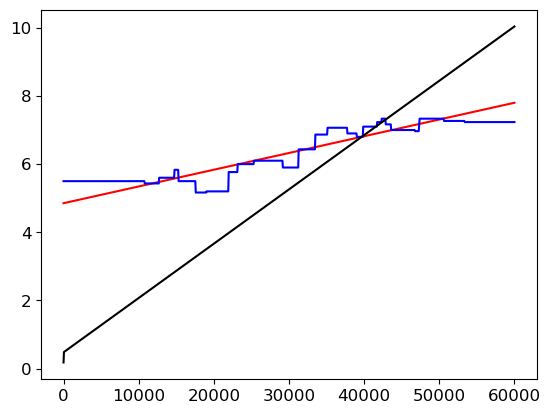

In [9]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

cyprus_life_satisfaction = mlp.predict(M)
print(f"Predicted Life Satisfaction for Cyprus: {cyprus_life_satisfaction[0]}")

mlp_score = mlp.score(X, y)
print(f"MLPRegressor Score: {mlp_score}")

# SWMAL Exercise

## Python Basics

#### Qa Indl√¶s og test modulet libitmal

In [14]:
import sys, os 
# Denne linje kode tilf√∏jer den angivne mappesti til listen over stier
sys.path.append(os.path.expanduser('C:/Users/Moheb/OneDrive/Desktop/Semester 6/MAL/GITMAL'))

# Denne linje kode import utils fra libitmal mappe
from libitmal import utils as itmalutils
itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


In [ ]:
# Koden ovenp√• tilf√∏jer en angiven mappesti til systemets stilliste, hvilket giver adgang til brugerdefinerede moduler.
# Derefter importeres et hj√¶lpeprogram med navnet "utils" fra mappen "libitmal" og k√∏rer tests p√• det ved hj√¶lp af
# "itmalutils.TestAll()." Output viser testresultaterne, herunder forskellige matrixmanipulationer og deres
# forventede resultater. "OK" i slutningen angiver, at alle tests er best√•et med succes og bekr√¶fter den korrekte
# funktionalitet af hj√¶lpeprogrammet.

#### Qb Opret og test af module

In [3]:
import sys, os 
sys.path.append(os.path.expanduser('C:/Users/Bruger/Desktop/Semester 6/Machine Learning/GITMAL/libitmal'))
from MyModule import Module as module
module.TestAll()

8
120
15


In [ ]:
# Koden oven p√• forklare at inde i Libitmal er der oprettet en modul ved navn MyModule, og 'Module.py' er blevet 
# oprettet indeni den. Module.py har nogle funktioner:
# add_two_numbers(a, b): Denne funktion tager to parametre og l√¶gger dem sammen.
# find_factorial(n): Denne funktion tager et tal som input og returnerer dets faktorial.
# sum_of_list_elements(list): Denne funktion beregner summen af elementerne i listen.
# TestAll(): Denne funktion kalder alle de ovenst√•ende funktioner og udskriver deres resultater

#### Qc Module recompile

In [ ]:
# Du kan bruge modulet 'importlib' til at genindl√¶se modulet eksplicit. 'Importlib' modulet vil tvinge jupyter notebook
# til at genindl√¶se modul√¶ndringerne. f.eks.
# import importlib -- Denne linje vil importere 'importlib' modulet
# import my_module -- Importer modulet med nye √¶ndringer
# importlib.reload(my_module) -- Denne linje vil tvinge jupyter til at genindl√¶se modulet (my_module)


#### Qe Klasse udvidelse med nogle funktioner og membervariabler

In [11]:
class MyClass:
   
    def myfun(self):
        self.myvar = "blah" B# En pr. klasse-instansvariabel
        print(f"This is a message inside the class, myvar={self.myvar}.")

myobjectx = MyClass()


# Efter at have k√∏rt koden uden 'self'-parameter

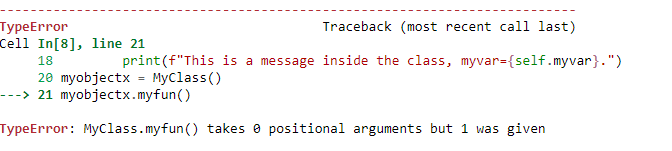

In [ ]:
# 'self' er et konventionelt anvendt navn til den f√∏rste parameter i instansmetoder i en klasse.
# Det henviser til instansen selv, hvilket giver dig mulighed for at f√• adgang til og manipulere dens
# attributter og kalde dens metoder.
#--------------------------------------------------------------------------------------------------------------

# Billedet ovenp√• viser en 'TypeError', der er blevet rejst. Det betyder, at myfun() ikke har en self-parameter.
# Python forventer, at der overf√∏res et argument (instansen selv) til metoden.

#### Qf Udvidelser af Konstruktor

In [16]:
class MyClass:
    def __init__(self,parameter1, parameter2):
        self.parameter1 = parameter1
        self.parameter2 = parameter2
    
object = MyClass("Hello", 12)
print(object.parameter1)

Hello


In [1]:
# I Python kan du definere en konstrukt√∏r ved at tilf√∏je en metode kaldet init. init er en speciel metode, der kaldes
# automatisk n√•r en instans af klassen oprettes. f.eks. __init__ i klassen "MyClass," 
# som initialiserer objekter med to parametre, parameter1 og parameter2, og gemmer dem som objekters attributter.
# N√•r et objekt oprettes med MyClass("Hello", 12), bliver parameter1 til "Hello" og parameter2 til 12.
#-------------------------------------------------------------------------------------------------------
# Python har ikke en traditionel destrukt√∏r som i C++. Python administrerer hukommelsen automatisk ligesom i C#.
# Derfor er der ingen behov for en destrukt√∏r.

#### Qg Udvidelse af klassen med to-string function

In [19]:
class MyClass:
    def __init__(self, job):
        self.job = job

    def __str__(self):
        return f" JobName='{self.job}'"

# opret en instance af MyClass
obj = MyClass("Engineer")
print(obj)


 JobName='Engineer'


In [ ]:
# Python bruger en speciel metode kaldet str. Denne metode kaldes automatisk, n√•r man bruger print() funktionen med en
# instans af klassen (self).f eks. metoden ovenp√• returnerer en tilpasset strengrepr√¶sentation af objektet, hvor
# "JobName='Engineer'" er strengen, der udskrives i stedet for den standardrepr√¶sentation

# cost_function


#### Qa

F√∏lgende designmatrix skal laves og printes:
$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$
I kodeblokken importeres de n√∏dvendige biblioteker, herunder NumPy og math. Derefter defineres vektorerne, x1, x2, x3 og x4, der repr√¶senterer hver s√∏jlevektor i matrixen. Disse vektorer udg√∏r feature-v√¶rdierne.

Herefter anvendes NumPy's vstack-funktion til at stable de definerede vektorer vertikalt, hvilket resulterer i oprettelsen af matricen X.

Endelig bruges print-funktionen til at udskrive matricen.

In [2]:
import numpy as np
import math

y = np.array([1,2,3,4]) # actual values

# Define the given vectors ùê±(ùëñ)
x1 = np.array([1, 2, 3])
x2 = np.array([4, 2, 1])
x3 = np.array([3, 8, 5])
x4 = np.array([-9, -1, 0])

X = np.vstack((x1, x2, x3, x4))

# Print the resulting ùêó matrix
print(X)


[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


#### Qb

I opgaven blev arbejdet med beregning af normer eller afstande mellem vektorer. To typer blev unders√∏gt: $\norm{1}$, og $\norm{2}$.

Normerne blev f√∏rst matematisk defineret og derefter implementeret i Python uden brug af biblioteker som math.sqrt eller numpy.linalg.norm. F√∏rst blev en 'low-level' implementering oprettet ved hj√¶lp af grundl√¶ggende operationer som +, *, og ** for at beregne normerne.

Implementeringerne blev testet ved sammenligning med forventede resultater for at sikre korrekt funktion, vha. 'assert' funktionen

Efter bekr√¶ftelse af test implementeringer blev $\norm{2}$ optimeret ved at bruge np.numpy's dot-operator i stedet for en eksplicit sum. Denne optimerede version blev kaldt L2Dot.



In [9]:
def L1(vector):
    assert isinstance(vector, np.ndarray), "Input must be a NumPy array"
    l1_norm = 0
    for element in vector:
        l1_norm += element if element >= 0 else -element
    return l1_norm

def L2(vector):
    assert isinstance(vector, np.ndarray), "Input must be a NumPy array"
    l2_norm = np.dot(vector.T, vector) ** 0.5
    return l2_norm

def L2Dot(vector):
    assert isinstance(vector, np.ndarray), "Input must be a NumPy array"
    return np.sqrt(np.dot(vector, vector))

    

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


### Qc

I opgaven blev der arbejdet med implementeringen af cost-funktionen ùêΩ og specifikt root mean squared error (RMSE).



F√∏rst blev funktionen RMSE lavet. Denne funktion tager to input: forudsagte v√¶rdier (predictions) og faktiske v√¶rdier (actual_values). Internt bruges den tidligere implementerede L2-norm-funktion, L2Dot, til at beregne kvadrerede fejl. Herefter multipliceres resultatet med 1/2 for at opn√• RMSE-v√¶rdien.

En dummy hypotese-funktion, ‚Ñéùëëùë¢ùëöùëöùë¶, blev givet for at returnerer den f√∏rste kolonne af designmatricen fra opgave Qa.

Endelig blev RMSE-funktionen testet ved at give den hypotesefunktionen samt y fra opgave Qa som inputs. Resultatet blev sammenlignet med forventede v√¶rdier for at bekr√¶fte korrektheden af RMSE-beregningerne.

In [12]:
def RMSE(predictions, actual_values):
    assert len(predictions) == len(actual_values), "Input arrays must have the same size"
    error = predictions - actual_values
    rmse = 1/2 * (L2(error))  # Call the L2 function to calculate the squared error
    return rmse

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


#### Qd

I denne opgave blev der udviklet en funktion til at beregne Mean Absolute Error (MAE). MAE beregnes ved at bruge L1 funktionen og sammenligne predicted values med actual values og beregne gennemsnittet af absolutte fejl for hvert datapunkt.

Funktionen MAE blev implementeret som vist nedenfor. Den tager de to inputarrays, predictions og actual_values, og kontrollerer f√∏rst, om de har samme st√∏rrelse. Herefter beregnes fejlene ved at tr√¶kke actual_values fra predictions. MAE-v√¶rdien opn√•s ved at tage gennemsnittet af absolutv√¶rdierne ved at gange med 1/4, da der er 4 v√¶rdier i hver vektor.

In [11]:
# TODO: solve Qd
def MAE(predictions, actual_values):
    assert len(predictions) == len(actual_values), "Input arrays must have the same size"
    error = predictions - actual_values
    mae = 1/4 * L1(error)  # Call the L2 function to calculate the squared error
    return mae

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert abs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


#### Qe Robust Code 

I funktionerne RMSE MAE er der lavet en assert som tjekker, om l√¶ngden af inputarrays predictions og actual_values er ens. Hvis de ikke har samme st√∏rrelse, udl√∏ser assert en fejl med den angivne meddelelse: "Input arrays must have the same size."

For L1 og L2 funktionerne tjekkes der for, om inputparameteren vector er en NumPy-array. Hvis vector ikke er en NumPy-array, udl√∏ser assert en AssertionError med meddelelsen: "Input must be a NumPy array."

### Qf Conclusion


I disse √∏velser har vi dykket ned i grundl√¶ggende begreber inden for ML, is√¶r fokuseret p√• vektor- og matrixoperationer, norms, cost function fejlmetrikker og robust kode. Her er de vigtigste pointer:

Vektor- og Matrixoperationer: Vi l√¶rte, hvordan man repr√¶senterer datasamples som vektorer og konstruerer datamatricer. Disse operationer er afg√∏rende for at arbejde med data inden for maskinl√¶ring, da de fleste algoritmer er afh√¶ngige af matrixmanipulationer.

Normer og Afstande: Vi udforskede L1 (Manhattan-normen) og L2 (Euklidisk norm) for vektorer. Forst√•else af disse normer er afg√∏rende for at m√•le afstande mellem data punkter.

Fejlmetrikker: Vi implementerede to fejlmetrikker, RMSE og MAE. Disse metrikker hj√¶lper med at vurdere performance af modellerne ved at kvantificere forskellen mellem predicted og actual values.

Robusthed: Vi fik en forst√•else for hvordan man skriver robust kode ved at inkludere fejltjekning og datavalidering. Dette sikrer, at vores funktioner h√•ndterer uventede input p√• en hensigtsm√¶ssig m√•de.

Gennem disse √∏velser dykkede vi dybere ned i matematikken bag maskinl√¶ringsalgoritmer, l√¶rte at m√•le fejl og afstande mellem datapunkter samt forstod vigtigheden af n√∏jagtighed og robust kodning i maskinl√¶ring.

# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

#### Qa  Load and display the MNIST data

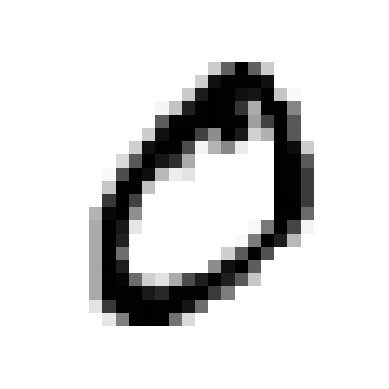

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

def MNIST_HentDatas√¶t():
    # For at undertrykke parseradvarslen er parseren blevet brugt
    X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff', cache=False, as_frame=False)
    return X, y

# Formerer et billededata punkt (data) og √¶ndrer formen fra 1D-array til 2D-array
def MNIST_PlotCiffer(data):
    billede = data.reshape(28, 28)
    # Farverne er sort og hvid
    plt.imshow(billede, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

X, y = MNIST_HentDatas√¶t()

ciffer_at_plotte = X[1]  # For eksempel: X[0] for at v√¶lge det anden ciffer i datas√¶ttet

# Eksempel p√• brug af funktionerne til at indl√¶se og plotte en enkelt ciffer
MNIST_PlotCiffer(ciffer_at_plotte)
plt.show()


In [1]:
# Koden ovenp√• indl√¶ser et billede af tallet "0" fra datas√¶ttet og bruger derefter matplotlib til at plotte tallet p√• 
# sk√¶rmen. Datas√¶ttet indeholder forskellige billeder af h√•ndskrevne tal, og koden v√¶lger det andet billede fra datas√¶ttet 
# og plotter det. Resultatet, som ses ovenfor, er en visuel repr√¶sentation af det h√•ndskrevne tal "0."

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)


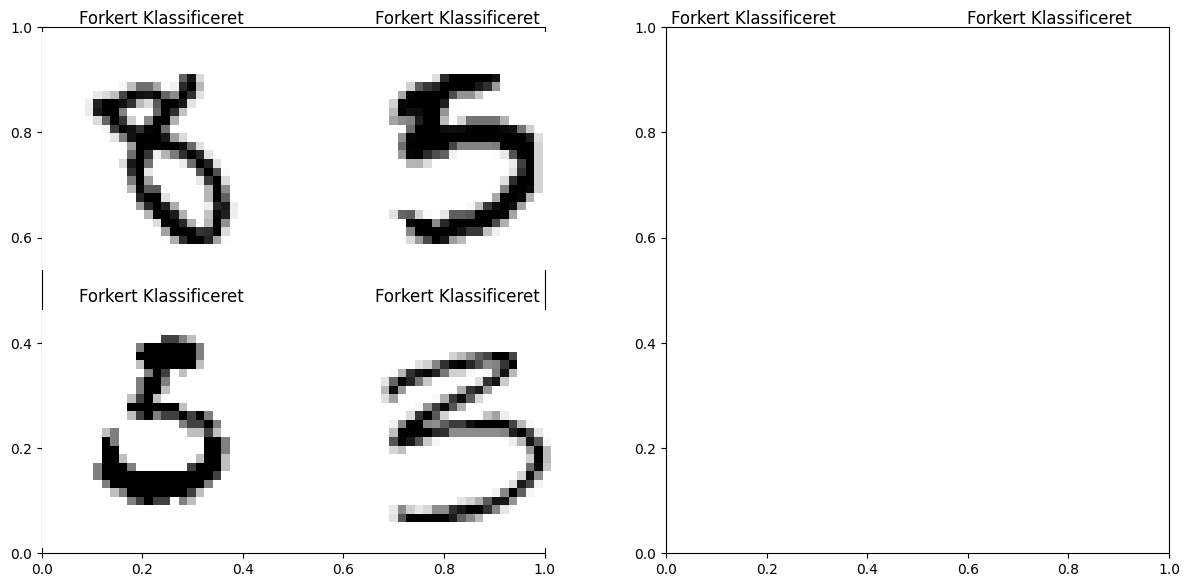

In [5]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = MNIST_HentDatas√¶t()

# train_test_split er blevet brugt til at opdele datas√¶ttet i tr√¶nings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if X.ndim == 3:
    print("Omformer X..")
    assert y.ndim == 1
    X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
assert X.ndim == 2
print(f"X.shape={X.shape}")  # X.shape= (70000, 784)

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

# Laver forudsigelser p√• testdataene
y_pred = sgd_classifier.predict(X_test)

# Evaluer modelpr√¶station. Denne kode identificerer, hvilke pr√∏ver der blev korrekt klassificeret, og
# hvilke der blev klassificeret forkert baseret p√• de forudsigelser, som modellen lavede
korrekt_klassificerede_indekser = (y_pred == y_test_5)
korrekt_klassificerede_pr√∏ver = X_test[korrekt_klassificerede_indekser]
forkert_klassificerede_indekser = (y_pred != y_test_5)
forkert_klassificerede_pr√∏ver = X_test[forkert_klassificerede_indekser]

# Plott korrekt klassificerede pr√∏ver
plt.figure(figsize=(12, 6))

# Plott korrekt klassificerede pr√∏ver
plt.subplot(1, 2, 1)
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(korrekt_klassificerede_pr√∏ver[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title("Korrekt Klassificeret")
    ax.axis("off")

# Plott forkert klassificerede pr√∏ver
plt.subplot(1, 2, 2)
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(forkert_klassificerede_pr√∏ver[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title("Forkert Klassificeret")
    ax.axis("off")
    
plt.tight_layout()  # denne linje forhindrer overlapning af akser
plt.show()

In [ ]:
# Koden ovenp√• tr√¶ner en klassifikator (SGD-klassifikator) til at identificere tallet "5" i MNIST-datas√¶ttet, som indeholder
#h√•ndskrevne tal. Den deler datas√¶ttet op i tr√¶nings- og testdata, tr√¶ner klassifikatoren og laver derefter forudsigelser
# Resultatet, som ses ovenfor, viser at koden printer b√•de korrekt og forkert klassificerede tal. B√•de korrekt og 
#forkert klassificerede tal vises side om side for at vise klassifikatorens pr√¶station.

# Advarselsteksten indikerer, at den nuv√¶rende m√•de, Matplotlib h√•ndterer overlappende akser, er for√¶ldet. ax.remove() og 
# plt.tight_layout() er blevet brugt for at fjerne advarslen, men det ikke lykkes
# l√∏st af robot (AI)

#### Qc Implement a dummy binary classifier

I denne opgave beskrives processen med at implementere en simpel bin√¶r klassifikator ved hj√¶lp af en Python-klasse.

Scikit-learn-klassifikatorer arver normalt fra BaseEstimator (og eventuelt ogs√• ClassifierMixin), og de skal have funktionerne, fit og predict. Selvom det er almindeligt at arve fra BaseEstimator, kan man ogs√• implementere en klasse, der indeholder fit- og predict funktioner, uden n√∏dvendigvis at arve fra den.

I nedenst√•ende kode er en simpel DummyClassifier-klasse implementeret. Dens fit-metode g√∏r intet, og predict-metoden forudsiger altid klassen 0. En instans af DummyClassifier oprettes, og fit kaldes med tr√¶ningsdata, hvor y_train_5 bruges som input. Derefter forudsiger predict-metoden klassifikationerne for testdataene, og n√∏jagtigheden beregnes ved hj√¶lp af accuracy_score-funktionen fra scikit-learn. Resultatet af accuracy scoren p√• 0.909 giver mening eftersom man forventer et ikke 5-tal 90% af gangene. DummyClassifier i bogen p.107 f√•r en lignende score.

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np

class DummyClassifier:
    def fit(self, X, y):
        # Ingenting beh√∏ver at blive tr√¶net, da forudsigelsen altid er den samme
        pass

    def predict(self, X):
        # Foruds√¶t altid klasse 0
        return np.zeros((X.shape[0],), dtype=int)



# Opret en instans af DummyClassifier
dummy_classifier = DummyClassifier()

# Tr√¶n dummyklassificatoren p√• tr√¶ningss√¶ttet
dummy_classifier.fit(X_train, y_train_5)

# Forudsig klassifikationerne for testdataene
y_pred_dummy = dummy_classifier.predict(X_test)

# Beregn n√∏jagtigheden
accuracy_dummy = accuracy_score(y_test_5, y_pred_dummy)

print("Dummy Classifier Accuracy:", accuracy_dummy)

# Opgave l√∏st med chatGPT


Dummy Classifier Accuracy: 0.9090714285714285


### Qd Conclusion

I denne opgave har vi udforsket MNIST-datasettet, som indeholder billeder af h√•ndskrevne cifre. Vi begyndte med at indl√¶se og forberede dataene. Dette omfattede opdeling af dataene i tr√¶nings- og testdatas√¶t, hvilket er afg√∏rende for at evaluere vores model p√• uafh√¶ngige data.

Derefter kastede vi os ud i tr√¶ningsprocessen ved at bruge SGD Classifier, til at skelne cifret "5" fra de √∏vrige cifre.

Til sidst skabte vi en Dummy Classifier, der altid gav den samme forudsigelse, nemlig "0". Denne havde en accuracy p√• over 0.9, hvilket lyder h√∏jt, men eftersom kun 10% af tallene er 5-taller giver dette mening. Dummyclassifieren gav os derfor et baseline-referencepunkt til vurdering af vores faktiske model.

# SWMAL Exercise


## Performance Metrics

#### Qa Implementer n√∏jagtighedsfunktionen og test den p√• MNIST-dataene

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# Hent data fra MNIST-datas√¶ttet og undertryk parseradvarslen
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# Opdel datas√¶ttet i tr√¶nings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opret en simpel dummy-classifier som baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Tr√¶n dummy-classifieren
dummy_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hj√¶lp af dummy-classifieren
y_pred = dummy_classifier.predict(X_test)

# Opret en SGD-classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Tr√¶n SGD-classifieren p√• tr√¶ningsdataene
sgd_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hj√¶lp af SGD-classifieren
sgd_y_pred = sgd_classifier.predict(X_test)

# Defin√©r MyAccuracy-funktionen
def MyAccuracy(y_true, y_pred): 
    
    # Find alle de korrekte forudsigelser (faktisk sande + sande forudsigelser)
    korrekte_forudsigelser = (y_true == y_pred).sum()
    
    # Summen af alle forudsigelser
    samlede_forudsigelser = len(y_true)  
    
    # Hvis n√¶vneren er nul, skal det h√•ndteres
    if samlede_forudsigelser == 0:
        raise ZeroDivisionError("Division med nul er ikke tilladt.")
    
    # Find n√∏jagtigheden ved hj√¶lp af den angivne funktion
    min_n√∏jagtighed = korrekte_forudsigelser / samlede_forudsigelser
    return min_n√∏jagtighed

# Beregn n√∏jagtigheder ved hj√¶lp af forskellige funktioner
n√∏jagtighed = accuracy_score(y_test, y_pred)
min_n√∏jagtighed = MyAccuracy(y_test, y_pred)
sgd_n√∏jagtighed = accuracy_score(y_test, sgd_y_pred)

# Udskriv alle n√∏jagtigheder
print(f"N√∏jagtighed ved brug af accuracy_score: {n√∏jagtighed:.2f}")
print(f"N√∏jagtighed ved brug af brugerdefineret n√∏jagtighedsfunktion: {min_n√∏jagtighed:.2f}")
print(f"N√∏jagtighed ved brug af SGDClassifier: {sgd_n√∏jagtighed:.2f}")

N√∏jagtighed ved brug af accuracy_score: 0.11
N√∏jagtighed ved brug af brugerdefineret n√∏jagtighedsfunktion: 0.11
N√∏jagtighed ved brug af SGDClassifier: 0.87


In [ ]:
# Begge n√∏jagtighedsmetoder, `accuracy_score` og den brugerdefinerede n√∏jagtighedsfunktion, producerer ens resultater,
# hvilket er en n√∏jagtighed p√• 0.11. Dette antyder, at begge metoder evaluerer klassifikationen ens for dummy-classifieren.
# P√• den anden side viser n√∏jagtigheden ved brug af SGDClassifier en v√¶sentlig forbedring med en n√∏jagtighed p√• 0.87.
# Dette indikerer, at SGDClassifier er i stand til at tr√¶ne p√• data og forudsige med betydeligt bedre pr√¶cision
# sammenlignet med dummy-classifieren og den brugerdefinerede funktion. Dette resultat underbygger SGDClassifier's evne
# til at l√¶re og generalisere fra tr√¶ningsdataene for at opn√• h√∏jere pr√¶stationer.

#### Qb Implementere og test af perfomance metrikker

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

# For at undertrykke parseradvarslen er parseren blevet brugt
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# train_test_split er blevet brugt til at opdele datas√¶ttet i tr√¶nings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opret en simpel dummy-classifier som baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Tr√¶n dummy-classifieren
dummy_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hj√¶lp af dummy-classifieren
dummy_y_pred = dummy_classifier.predict(X_test)

# Opret en SGD-classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Tr√¶n SGD-classifieren p√• tr√¶ningsdataene
sgd_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hj√¶lp af SGD-classifieren
sgd_y_pred = sgd_classifier.predict(X_test)

# Alle funktioner f√∏lger formlerne, der er angivet i begyndelsen af filen

def MinPr√¶cision(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    
    # Hvis summen af sande positive og falske positive er lig med 0, returneres 0
    if TP + FP == 0:
        return 0.0
    return (TP / (TP + FP))

def MinRecall(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 1) & (y_pred == 0)).sum()
    
    if TP + FP == 0:
        return 0.0
    return (TP / (TP + FP))
    
def MinF1Score(y_true, y_pred):
    pr√¶cision = MinPr√¶cision(y_true, y_pred)
    recall = MinRecall(y_true, y_pred)
    
    if pr√¶cision + recall == 0:
        return 0.0
    
    return 2 * (pr√¶cision * recall) / (pr√¶cision + recall)

# Beregn pr√¶cision, recall og F1-score ved hj√¶lp af brugerdefinerede funktioner
pr√¶cision_brugerdefineret_sgd = MinPr√¶cision(y_test.astype(int), sgd_y_pred.astype(int))
recall_brugerdefineret_sgd = MinRecall(y_test.astype(int), sgd_y_pred.astype(int))
f1_score_brugerdefineret_sgd = MinF1Score(y_test.astype(int), sgd_y_pred.astype(int))

pr√¶cision_brugerdefineret_dummy = MinPr√¶cision(y_test.astype(int), dummy_y_pred.astype(int))
recall_brugerdefineret_dummy = MinRecall(y_test.astype(int), dummy_y_pred.astype(int))
f1_score_brugerdefineret_dummy = MinF1Score(y_test.astype(int), dummy_y_pred.astype(int))

# Beregn pr√¶cision, recall og F1-score ved hj√¶lp af sklearn's funktioner til sammenligning
pr√¶cision_sklearn_sgd = precision_score(y_test, sgd_y_pred, average='micro')
recall_sklearn_sgd = recall_score(y_test, sgd_y_pred, average='micro')
f1_score_sklearn_sgd = f1_score(y_test, sgd_y_pred, average='micro')

pr√¶cision_sklearn_dummy = precision_score(y_test, dummy_y_pred, average='micro')
recall_sklearn_dummy = recall_score(y_test, dummy_y_pred, average='micro')
f1_score_sklearn_dummy = f1_score(y_test, dummy_y_pred, average='micro')

# Udskriv resultaterne
print("SGD Classifier (Mikrogennemsnit for Multiklasse):")
print(f"Brugerdefineret pr√¶cision: {pr√¶cision_brugerdefineret_sgd:.2f}")
print(f"Brugerdefineret recall: {recall_brugerdefineret_sgd:.2f}")
print(f"Brugerdefineret F1-score: {f1_score_brugerdefineret_sgd:.2f}")
print(f"Sklearn pr√¶cision: {pr√¶cision_sklearn_sgd:.2f}")
print(f"Sklearn recall: {recall_sklearn_sgd:.2f}")
print(f"Sklearn F1-score: {f1_score_sklearn_sgd:.2f}")

print("\nDummy Classifier (Mikrogennemsnit for Multiklasse):")
print(f"Brugerdefineret pr√¶cision: {pr√¶cision_brugerdefineret_dummy:.2f}")
print(f"Brugerdefineret recall: {recall_brugerdefineret_dummy:.2f}")
print(f"Brugerdefineret F1-score: {f1_score_brugerdefineret_dummy:.2f}")
print(f"Sklearn pr√¶cision: {pr√¶cision_sklearn_dummy:.2f}")
print(f"Sklearn recall: {recall_sklearn_dummy:.2f}")

SGD Classifier (Mikrogennemsnit for Multiklasse):
Brugerdefineret pr√¶cision: 1.00
Brugerdefineret recall: 1.00
Brugerdefineret F1-score: 1.00
Sklearn pr√¶cision: 0.87
Sklearn recall: 0.87
Sklearn F1-score: 0.87

Dummy Classifier (Mikrogennemsnit for Multiklasse):
Brugerdefineret pr√¶cision: 0.54
Brugerdefineret recall: 1.00
Brugerdefineret F1-score: 0.70
Sklearn pr√¶cision: 0.11
Sklearn recall: 0.11


In [ ]:
# Dette er den samme kode som tidligere, Koden tr√¶ner to forskellige klassifaktioner (SGD og dummy klassifier) og beregner
# alle de n√¶vnte performance metrikker. Der er lidt forskel p√• output for SGD og dummy arbejder p√• en forskellige m√•de dvs.
# SGD fors√∏ger at l√¶re data og laver forudsigelser baseret p√• m√∏nstre i data og dummy klassifier er bare en simpel baseline 
# model der altid forudsiger den mest hypigt klasse i tr√¶ningsdataene
# l√∏st by robot(AI)

#### Qc Confusion Matrix

In [ ]:
# [TN FP]
# [FN TP]
# TN = Sandt negativ, FN = Falsk negativ, FP = Falsk positiv, TP = Sandt positiv
# Ved at bytte om p√• de faktiske og forudsagte etiketter vil den beregne forvirringsmatricen for de modsatte klasser, 
# hvilket f√∏rer til forkert resultat.


#### Qd A Confusion Matrix Heat-map

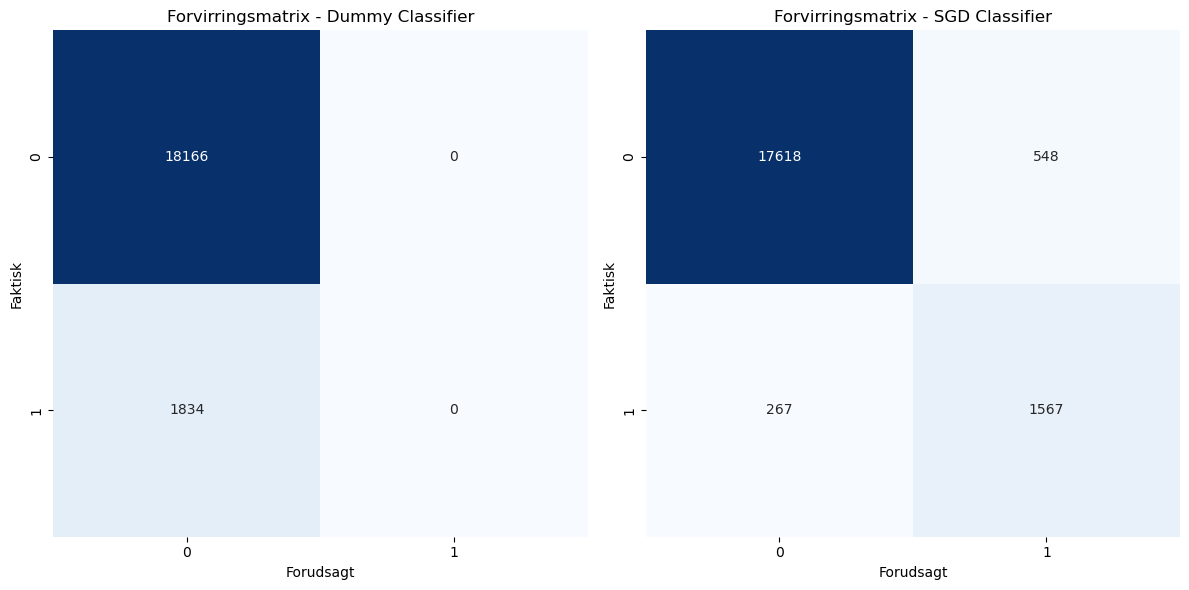

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Forvirringsmatrix for Dummy Classifier
M_dummy = np.array([[18166, 0],
                    [1834, 0]])

# Forvirringsmatrix for SGD Classifier
M_sgd = np.array([[17618, 548],
                  [267, 1567]])

# Opret en figur med subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Opret varmekort for begge forvirringsmatricer
sns.heatmap(M_dummy, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Forvirringsmatrix - Dummy Classifier')
axes[0].set_xlabel('Forudsagt')
axes[0].set_ylabel('Faktisk')

sns.heatmap(M_sgd, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Forvirringsmatrix - SGD Classifier')
axes[1].set_xlabel('Forudsagt')
axes[1].set_ylabel('Faktisk')

plt.tight_layout()
plt.show()


In [ ]:
# To forvirringsmatricer er defineret ved hj√¶lp af NumPy-arrays. Disse matricer repr√¶senterer resultaterne af to forskellige klassifikatorer:
# Dummy Classifier og SGD Classifier.
# Hver forvirringsmatrix er en 2x2 matrix med fire v√¶rdier:
# V√¶rdien √∏verst til venstre repr√¶senterer Sandt Negative (TN).
# V√¶rdien √∏verst til h√∏jre repr√¶senterer Falske Positive (FP).
# V√¶rdien nederst til venstre repr√¶senterer Falske Negative (FN).
# V√¶rdien nederst til h√∏jre repr√¶senterer Sandt Positive (TP).

# L√∏st af en robot (AI)

### Qe Conclusion

In [ ]:
# Vi dykkede ned i metrikker som n√∏jagtighed, pr√¶cision, recall og F1-score for at kvantificere modelpr√¶stationen. 
# Implementerede brugerdefinerede funktioner til pr√¶cision, recall og F1-score, hvilket fordybede vores forst√•else af deres
# beregninger. Ved hj√¶lp af Scikit-Learn anvendte vi standard evalueringsmetrikker, hvilket gjorde det muligt at sammenligne
# med vores brugerdefinerede implementeringer. Ved at vurdere en Dummy Classifier mod en SGD Classifier forstod vi 
# betydningen af modelvalg. Vi l√¶rte vigtigheden af at opdele data i tr√¶nings- og testm√¶ngder for en realistisk 
# modelvurdering. Vi l√¶rte, hvordan ubalancerede datas√¶t blev tydelige, hvilket understregede v√¶rdien af pr√¶cision og
# recall. Til sidst l√¶rte vi varmekort for at skabe en klar pr√¶sentation og fortolkning af evalueringsresultaterne. Alt 
# i alt udstyrede disse √∏velser os til at vurdere og sammenligne machine learning-modeller grundigt. Vi forstod 
# metriskompromisser, forfine vores f√¶rdigheder inden for dataopdeling og anerkendte udfordringerne ved ubalancerede data.
